# Import Required Packages

In [1]:
import textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.ndimage import gaussian_filter
from PyEMD import EMD as pyemd0215
import emd as emd040

In [9]:
import AdvEMDpy
from AdvEMDpy.emd_hilbert import hilbert_spectrum

ModuleNotFoundError: No module named 'emd_utils'

# Synthetic Example: Duffing Equation

\begin{equation} \label{spring}
    \frac{d^2x(t)}{dt^2} + {\omega}x(t) = 0,
\end{equation}

\begin{equation} \label{Duffing_equation}
    \frac{d^2x(t)}{dt^2} + \Big(1 - x^2(t)\Big)x(t) = \frac{1}{10}\text{cos}\bigg(\frac{1}{25}2{\pi}t\bigg),
\end{equation}

# Set-Up of Duffing Equation

In [3]:
def duffing_equation(xy, ts):
    gamma = 0.1
    epsilon = 1
    omega = ((2 * np.pi) / 25)
    return [xy[1], xy[0] - epsilon * xy[0] ** 3 + gamma * np.cos(omega * ts)]


t = np.linspace(0, 150, 1501)
XY0 = [1, 1]
solution = odeint(duffing_equation, XY0, t)
x = solution[:, 0]
dxdt = solution[:, 1]

# Plot Displacement and Velocity

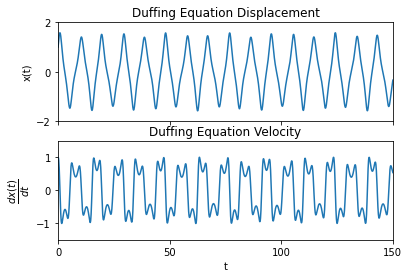

In [4]:
x_points = [0, 50, 100, 150]
x_names = {0, 50, 100, 150}
y_points_1 = [-2, 0, 2]
y_points_2 = [-1, 0, 1]

fig, axs = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.2)
axs[0].plot(t, x)
axs[0].set_title('Duffing Equation Displacement')
axs[0].set_ylim([-2, 2])
axs[0].set_xlim([0, 150])

axs[1].plot(t, dxdt)
axs[1].set_title('Duffing Equation Velocity')
axs[1].set_ylim([-1.5, 1.5])
axs[1].set_xlim([0, 150])

axis = 0
for ax in axs.flat:
    ax.label_outer()
    if axis == 0:
        ax.set_ylabel('x(t)')
        ax.set_yticks(y_points_1)
    if axis == 1:
        ax.set_ylabel(r'$ \dfrac{dx(t)}{dt} $')
        ax.set(xlabel='t')
        ax.set_yticks(y_points_2)
    ax.set_xticks(x_points)
    ax.set_xticklabels(x_names)
    axis += 1
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

# PyEMD 0.2.10

/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


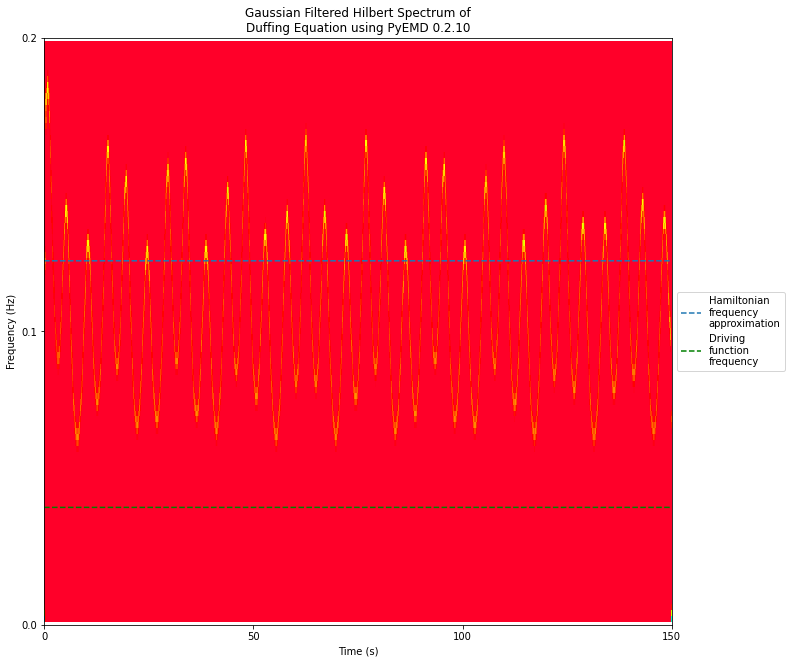

In [5]:
pyemd = pyemd0215()
py_emd = pyemd(x)
IP, IF, IA = emd040.spectra.frequency_transform(py_emd.T, 10, 'hilbert')
freq_edges, freq_bins = emd040.spectra.define_hist_bins(0, 0.2, 100)
hht = emd040.spectra.hilberthuang(IF, IA, freq_edges)
hht = gaussian_filter(hht, sigma=1)
ax = plt.subplot(111)
plt.title(textwrap.fill('Gaussian Filtered Hilbert Spectrum of Duffing Equation using PyEMD 0.2.10', 40))
plt.pcolormesh(t, freq_bins, hht, cmap='gist_rainbow', vmin=0, vmax=np.max(np.max(np.abs(hht))))
plt.plot(t[:-1], 0.124 * np.ones_like(t[:-1]), '--', label=textwrap.fill('Hamiltonian frequency approximation', 15))
plt.plot(t[:-1], 0.04 * np.ones_like(t[:-1]), 'g--', label=textwrap.fill('Driving function frequency', 15))
plt.xticks([0, 50, 100, 150])
plt.yticks([0, 0.1, 0.2])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.75, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

# emd 0.3.3

/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


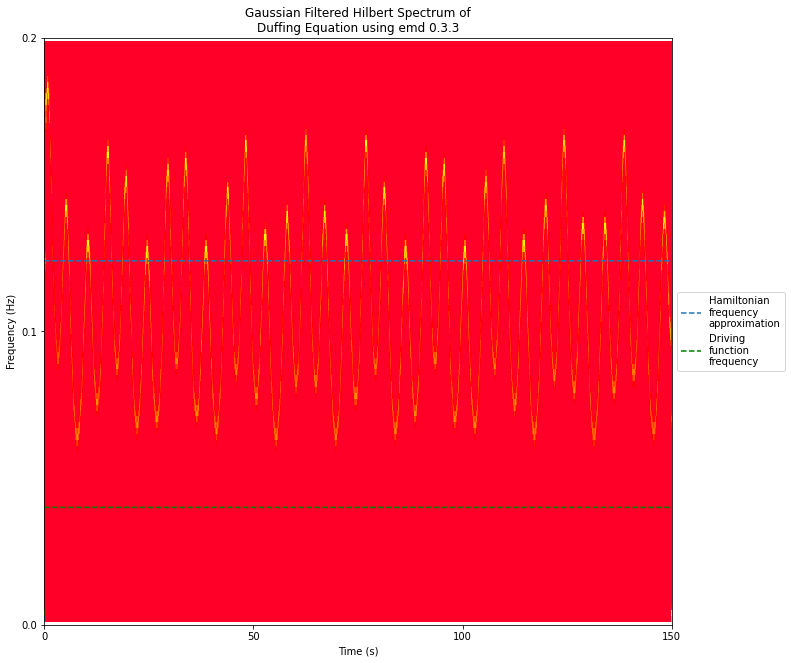

In [6]:
emd_sift = emd040.sift.sift(x)
IP, IF, IA = emd040.spectra.frequency_transform(emd_sift, 10, 'hilbert')
freq_edges, freq_bins = emd040.spectra.define_hist_bins(0, 0.2, 100)
hht = emd040.spectra.hilberthuang(IF, IA, freq_edges)
hht = gaussian_filter(hht, sigma=1)
ax = plt.subplot(111)
plt.title(textwrap.fill('Gaussian Filtered Hilbert Spectrum of Duffing Equation using emd 0.3.3', 40))
plt.pcolormesh(t, freq_bins, hht, cmap='gist_rainbow', vmin=0, vmax=np.max(np.max(np.abs(hht))))
plt.plot(t[:-1], 0.124 * np.ones_like(t[:-1]), '--', label=textwrap.fill('Hamiltonian frequency approximation', 15))
plt.plot(t[:-1], 0.04 * np.ones_like(t[:-1]), 'g--', label=textwrap.fill('Driving function frequency', 15))
plt.xticks([0, 50, 100, 150])
plt.yticks([0, 0.1, 0.2])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.75, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

# AdvEMDpy

In [7]:
emd_duffing = AdvEMDpy.EMD(time=t, time_series=x)
emd_duff, _, _, _, _, emd_ht_duff, emd_if_duff = emd_duffing.empirical_mode_decomposition(verbose=False, dtht=True)

fig, axs = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.3)
axs[0].plot(t, emd_duff[1, :], label='AdvEMDpy')
axs[0].plot(t, py_emd[0, :], '--', label='PyEMD 0.2.10')
axs[0].plot(t, emd_sift[:, 0], '--', label='emd 0.3.3')
axs[0].set_title('IMF 1')
axs[0].set_ylim([-2, 2])
axs[0].set_xlim([0, 150])

axs[1].plot(t, emd_duff[2, :], label='AdvEMDpy')
axs[1].plot(t, py_emd[1, :], '--', label='PyEMD 0.2.10')
axs[1].plot(t, emd_sift[:, 1], '--', label='emd 0.3.3')
axs[1].plot(t, 0.1 * np.cos(0.04 * 2 * np.pi * t), '--', label=r'$0.1$cos$(0.08{\pi}t)$')
axs[1].set_title('IMF 2')
axs[1].set_ylim([-0.2, 0.4])
axs[1].set_xlim([0, 150])

axis = 0
for ax in axs.flat:
    ax.label_outer()
    if axis == 0:
        ax.set_ylabel(r'$\gamma_1(t)$')
        ax.set_yticks([-2, 0, 2])
    if axis == 1:
        ax.set_ylabel(r'$\gamma_2(t)$')
        ax.set_yticks([-0.2, 0, 0.2])
    box_0 = ax.get_position()
    ax.set_position([box_0.x0, box_0.y0, box_0.width * 0.85, box_0.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
    ax.set_xticks(x_points)
    ax.set_xticklabels(x_names)
    axis += 1
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

NameError: name 'AdvEMDpy' is not defined

# Sum of absolute errors between true underlying driving function and IMF 2 for each package

\begin{equation}
\begin{split}
    \sum_{i=0}^{1500}\bigg|IMF^{emd}_{2}(t_i) - 0.1\text{cos}(0.08\pi(t_i))\bigg| &= 21.434\\
    \sum_{i=0}^{1500}\bigg|IMF^{PyEMD}_{2}(t_i) - 0.1\text{cos}(0.08\pi(t_i))\bigg| &= 20.774\\
    \sum_{i=0}^{1500}\bigg|IMF^{AdvEMDpy}_{2}(t_i) - 0.1\text{cos}(0.08\pi(t_i))\bigg| &= 15.978,
\end{split}
\end{equation}

In [8]:
print(f'emd 0.3.3:    {round(sum(abs(0.1 * np.cos(0.04 * 2 * np.pi * t) - emd_sift[:, 1])), 3)}')
print(f'PyEMD 0.2.10: {round(sum(abs(0.1 * np.cos(0.04 * 2 * np.pi * t) - py_emd[1, :])), 3)}')
print(f'AdvEMDpy:     {round(sum(abs(0.1 * np.cos(0.04 * 2 * np.pi * t) - emd_duff[2, :])), 3)}')

emd 0.3.3:    21.434
PyEMD 0.2.10: 20.774
AdvEMDpy:     15.978


# Hilbert spectrum using AdvEMDpy

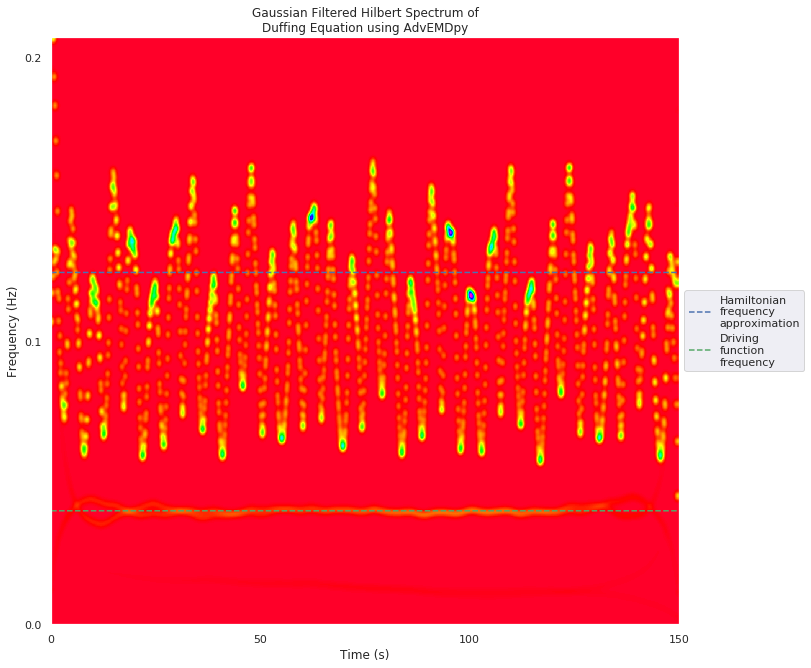

In [9]:
hs_ouputs = hilbert_spectrum(t, emd_duff, emd_ht_duff, emd_if_duff, max_frequency=1.3, plot=False)

ax = plt.subplot(111)
plt.title(textwrap.fill('Gaussian Filtered Hilbert Spectrum of Duffing Equation using AdvEMDpy', 40))
x_hs, y, z = hs_ouputs
y = y / (2 * np.pi)
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
plt.plot(t[:-1], 0.124 * np.ones_like(t[:-1]), '--', label=textwrap.fill('Hamiltonian frequency approximation', 15))
plt.plot(t[:-1], 0.04 * np.ones_like(t[:-1]), 'g--', label=textwrap.fill('Driving function frequency', 15))
plt.xticks([0, 50, 100, 150])
plt.yticks([0, 0.1, 0.2])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.75, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

# Real-World Example: Carbon Dioxide Concentration

# Load CO2 data

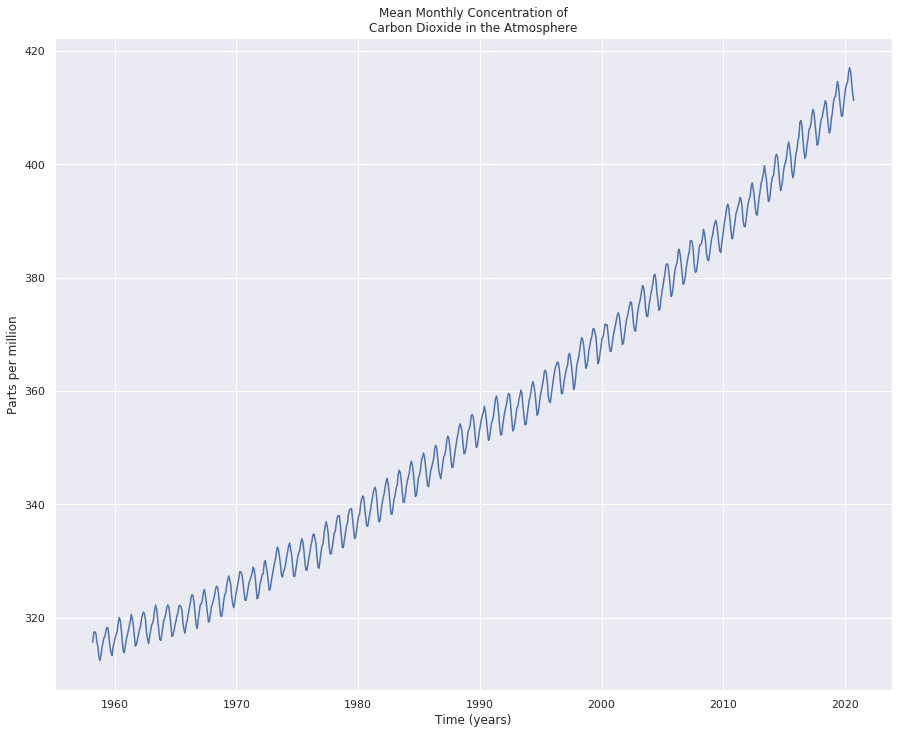

In [10]:
CO2_data = pd.read_csv('../Carbon Data/co2_mm_mlo.csv', header=51)

plt.plot(CO2_data['month'], CO2_data['decimal date'])
plt.title(textwrap.fill('Mean Monthly Concentration of Carbon Dioxide in the Atmosphere', 35))
plt.ylabel('Parts per million')
plt.xlabel('Time (years)')
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

signal = CO2_data['decimal date']
signal = np.asarray(signal)
time = CO2_data['month']
time = np.asarray(time)

# PyEMD 0.2.10

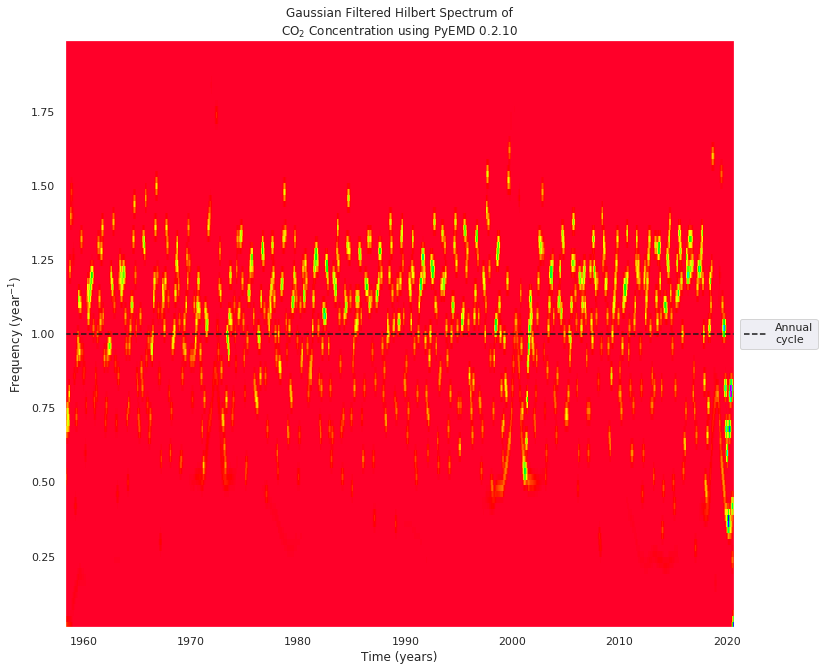

In [11]:
pyemd = pyemd0215()
py_emd = pyemd(signal)
IP, IFpyemd, IA = emd040.spectra.frequency_transform(py_emd[:2, :].T, 12, 'hilbert')
freq_edges, freq_bins = emd040.spectra.define_hist_bins(0, 2, 100)
hht = emd040.spectra.hilberthuang(IFpyemd, IA, freq_edges)
hht = gaussian_filter(hht, sigma=1)
fig, ax = plt.subplots()
plt.title(textwrap.fill('Gaussian Filtered Hilbert Spectrum of CO$_{2}$ Concentration using PyEMD 0.2.10', 45))
plt.ylabel('Frequency (year$^{-1}$)')
plt.xlabel('Time (years)')
plt.pcolormesh(time, freq_bins, hht, cmap='gist_rainbow', vmin=0, vmax=np.max(np.max(np.abs(hht))))
plt.plot(time, np.ones_like(time), 'k--', label=textwrap.fill('Annual cycle', 10))
box_0 = ax.get_position()
ax.set_position([box_0.x0 + 0.0125, box_0.y0 + 0.075, box_0.width * 0.8, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

# emd 0.3.3

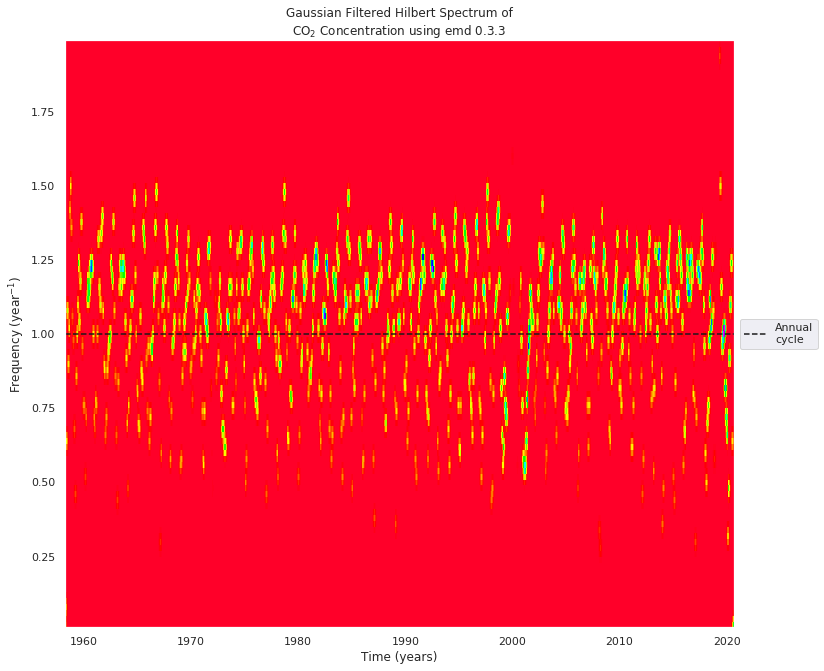

In [12]:
emd_sift = emd040.sift.sift(signal)
IP, IFemd, IA = emd040.spectra.frequency_transform(emd_sift[:, :1], 12, 'hilbert')
freq_edges, freq_bins = emd040.spectra.define_hist_bins(0, 2, 100)
hht = emd040.spectra.hilberthuang(IFemd, IA, freq_edges)
hht = gaussian_filter(hht, sigma=1)
fig, ax = plt.subplots()
plt.title(textwrap.fill('Gaussian Filtered Hilbert Spectrum of CO$_{2}$ Concentration using emd 0.3.3', 45))
plt.ylabel('Frequency (year$^{-1}$)')
plt.xlabel('Time (years)')
plt.pcolormesh(time, freq_bins, hht, cmap='gist_rainbow', vmin=0, vmax=np.max(np.max(np.abs(hht))))
plt.plot(time, np.ones_like(time), 'k--', label=textwrap.fill('Annual cycle', 10))
box_0 = ax.get_position()
ax.set_position([box_0.x0 + 0.0125, box_0.y0 + 0.075, box_0.width * 0.8, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

# AdvEMDpy

/home/cole/miniconda3/envs/emd/lib/python3.7/site-packages/AdvEMDpy/AdvEMDpy.py:1191: UserWarning: Recommended knots are subset of knot time points for discontinuity issues.
  warnings.warn('Recommended knots are subset of knot time points for discontinuity issues.')


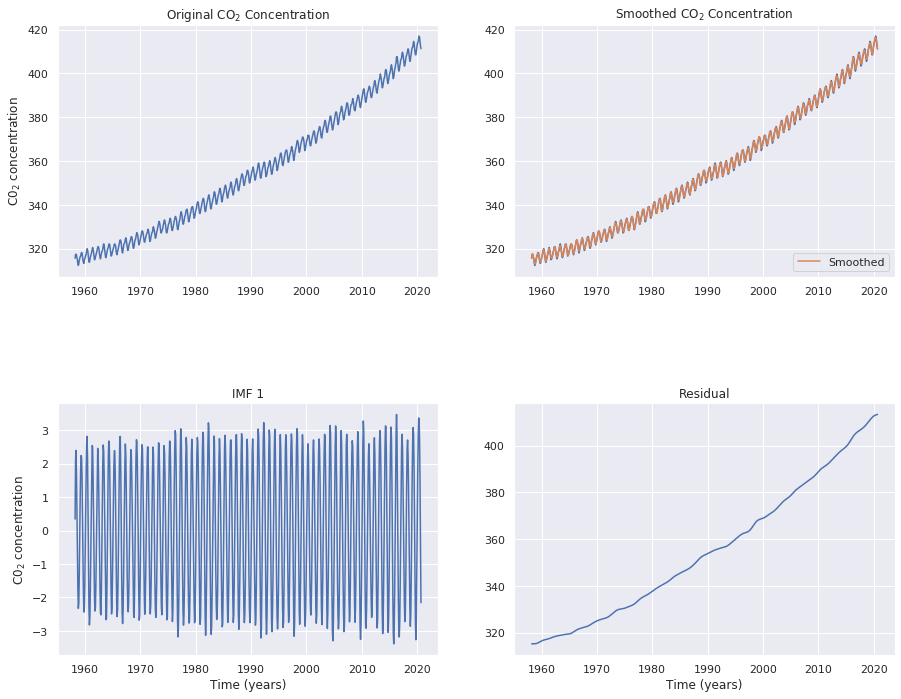

In [13]:
knots = np.linspace(time[0], time[-1], 200)
emd_example = AdvEMDpy.EMD(time=time, time_series=signal)
imfs, _, _, _, _, hts, ifs = emd_example.empirical_mode_decomposition(knots=knots, knot_time=time, verbose=False, dtht=True)

fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.5)
axs[0, 0].plot(time, signal)
axs[0, 1].plot(time, signal)
axs[0, 1].plot(time, imfs[0, :], label='Smoothed')
axs[0, 1].legend(loc='lower right')
axs[1, 0].plot(time, imfs[1, :])
axs[1, 1].plot(time, imfs[2, :])

axis = 0
for ax in axs.flat:
    if axis == 0:
        ax.set(ylabel=R'C0$_2$ concentration')
    if axis == 1:
        pass
    if axis == 2:
        ax.set(ylabel=R'C0$_2$ concentration')
        ax.set(xlabel='Time (years)')
    if axis == 3:
        ax.set(xlabel='Time (years)')
    axis += 1

plt.gcf().subplots_adjust(bottom=0.15)

axs[0, 0].set_title(r'Original CO$_2$ Concentration')
axs[0, 1].set_title('Smoothed CO$_2$ Concentration')
axs[1, 0].set_title('IMF 1')
axs[1, 1].set_title('Residual')

plt.gcf().subplots_adjust(bottom=0.15)
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

# Sum of absolute errors between annual frequency and instantaneous frequency of IMF 1 for each package

\begin{equation}
\begin{split}
    \sum_{i=0}^{750}\bigg|IF^{PyEMD}_{1}(t_i) - 1\bigg| &= 181.076\\
    \sum_{i=0}^{750}\bigg|IF^{emd}_{1}(t_i) - 1\bigg| &= 174.047\\
    \sum_{i=0}^{750}\bigg|IF^{AdvEMDpy}_{1}(t_i) - 1\bigg| &= 37.616,
\end{split}
\end{equation}

In [14]:
print(f'PyEMD 0.2.10: {round(sum(np.abs(IFpyemd[:, 0] - np.ones_like(IFpyemd[:, 0]))), 3)}')
print(f'emd 0.3.3:    {round(sum(np.abs(IFemd - np.ones_like(IFemd)))[0], 3)}')
print(f'AdvEMDpy:     {round(sum(np.abs(ifs[1, :] / (2 * np.pi) - np.ones_like(ifs[1, :]))), 3)}')

PyEMD 0.2.10: 181.076
emd 0.3.3:    174.047
AdvEMDpy:     34.791


# Hilbert spectrum using AdvEMDpy

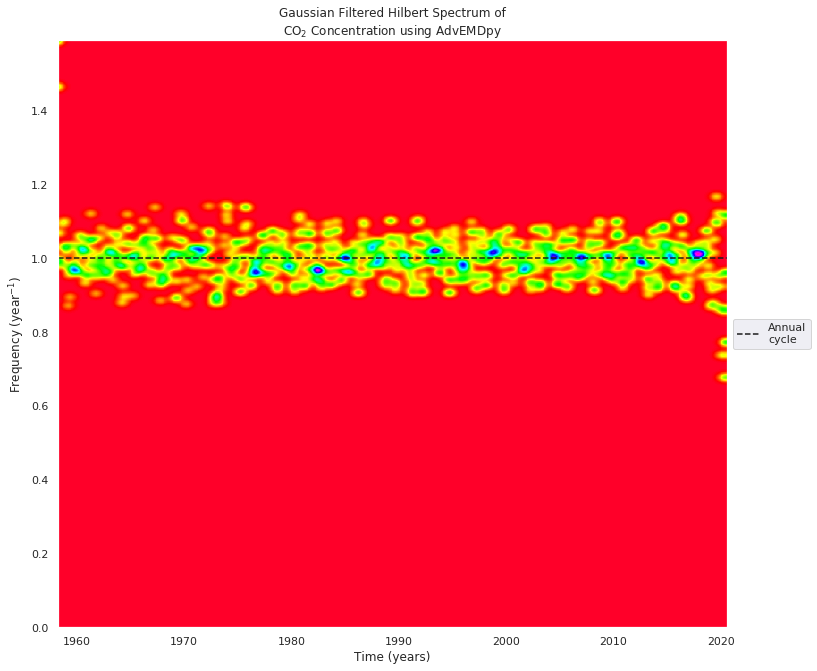

In [15]:
hs_ouputs = hilbert_spectrum(time, imfs, hts, ifs, max_frequency=10, which_imfs=[1], plot=False)

x_hs, y, z = hs_ouputs
y = y / (2 * np.pi)

z_min, z_max = 0, np.abs(z).max()
fig, ax = plt.subplots()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
ax.set_title(textwrap.fill(r'Gaussian Filtered Hilbert Spectrum of CO$_{2}$ Concentration using AdvEMDpy', 40))
plt.ylabel('Frequency (year$^{-1}$)')
plt.xlabel('Time (years)')
plt.plot(x_hs[0, :], np.ones_like(x_hs[0, :]), 'k--', label=textwrap.fill('Annual cycle', 10))
ax.axis([x_hs.min(), x_hs.max(), y.min(), y.max()])

box_0 = ax.get_position()
ax.set_position([box_0.x0 + 0.0125, box_0.y0 + 0.075, box_0.width * 0.8, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()